In [190]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import path
import scipy
import shapely
from scipy import stats
import matplotlib.patches as patches
from scipy.stats import gaussian_kde
from astropy.table import QTable, Table, Column

In [191]:
# generate data points (x,y)
# take in the number of the data points you want to create
# return randomly generated data points
def GenerateData(Size):
    Data = np.random.random_sample((Size, 2))
    return(Data)

In [192]:
# count the data points in each region
# take in the regions and the data points
# return an array that hold the counts in each region
def CheckData(Areas,Data):
    c=np.empty(3)
    Check = np.zeros(len(Data))
    for i in range(3):
        c[i]=np.count_nonzero(Areas[i].contains_points(Data)) 
    return (c)

In [193]:
# calculate the expect value and the exact value of region A
# take in the array that hold the counts in each region and size of data points
# return the expect value and the exact value of region A
def ExaVSExp (c,Size):
    exact = Size - c[0] - c[1] - c[2]
    expect = c[0] / c[2] * c[1] 
    return (expect,exact)

In [194]:
# generate array of data with giving information
# if the state is 0 it will return the different between expect and exact
# if the state is 1 it will return the percent error between expect and exact
def genme(Repeat,Areas,Size,state):
    for j in range(Repeat):
        Data = GenerateData(Size)
        c = CheckData(Areas,Data)
        if (c[2] != 0):
            [expect,exact] = ExaVSExp (c,Size)
            if(state == 0):
                yield expect-exact
            if(state == 1):
                yield PercentError(expect,exact)

In [195]:
# calculate the percent error
# take in the expect and exact value
# return the percent error between expect and exact
def PercentError(expect,exact):
    return abs(expect-exact)/exact * 100

In [196]:
# divide region form (0,0) to (1,1) into 4 regions with given x axis and y axis
# return array that include 4 regions 
def regions(xAxis,yAxis):
    Areas = [path.Path([(0,yAxis), (xAxis, yAxis), (xAxis,1), (0, 1),(0,yAxis)]), path.Path([(xAxis,0), (1, 0), (1, yAxis), (xAxis, yAxis),(xAxis,0)]), path.Path([(0,0), (0, yAxis), (xAxis, yAxis), (xAxis, 0),(0,0)]),path.Path([(xAxis,yAxis), (1, yAxis), (1,1), (xAxis,1),(xAxis,yAxis)])]
    return Areas

In [197]:
# calculate the sigma and number of fail for different size of the Statistics
# return array that Size, Sigma, Number Fail
def ErrorPlots (Size,state):
    Sigma = np.zeros(len(Size))
    NumberFail = np.zeros(len(Size))
    for i in range(len(Size)):
        test1 = [j for j in genme(Repeat1,Areas1,Size[i],state)]
        NumberFail[i] = Repeat1-len(test1)
        Sigma[i] = np.std(test1)
    return [Size, Sigma, NumberFail]

# Background

Jeff Jiang 

1840801

When we investigate huge amount of data for something new, we often must consider the background. One way to calculate the background is to look in a region away from your signal and extrapolate what you see there to the signal region. We can split the 𝑥, 𝑦 plane into four regions, A, B, C, and D. We can use the property $\frac{B}{D}=\frac{A}{C}$ to find the signal in region A if we know the signal in B, C, and D.

In order to show that $\frac{B}{D}=\frac{A}{C}$ for the background distribution. We have to proof $F(x,y)=F(x)F(y)$ for all $x$ and $y$, when $x$ and $y$ are not correlated.
$$F(x,y) = \int_{-\infty}^y\int_{-\infty}^xf(x,y)dxdy$$
$$= \int_{-\infty}^y\int_{-\infty}^xf(x)f(y)dxdy$$
$$= (\int_{-\infty}^xf(x)dx)(\int_{-\infty}^yf(y)dy)$$
$$= F(x)F(y)$$

In order to see if the method works, we generate random 1000 data points and plot them on a plane that goes from (0,0) to (1,1).Then we divide the plot in to 4 region A, B, C, and D (x axis = 0.6 and y axis = 0.6).

In [198]:
Size1 = 1000
Data1 = GenerateData(Size1)
x = Data1[:,0]
y = Data1[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
Areas1=regions(0.6,0.6)

Text(0, 0.5, 'Y values')

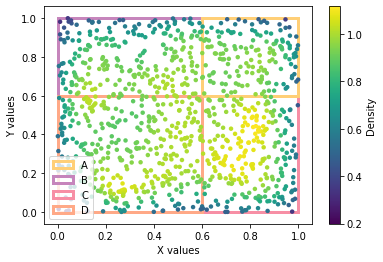

In [199]:
fig, ax = plt.subplots(1, 1)
EdgeColor = ['#c685bc','#f78fa5','#ffa987','#ffcf77']
Label = ['B','C','D','A']
for i in range(4):
    ax.add_patch(patches.PathPatch(Areas1[i], facecolor='none',edgecolor = EdgeColor[i],lw = 3, label=Label[i]))
sc = ax.scatter(x,y, c=z, s=20, edgecolor='', zorder=2)
ax.legend(handles=[patch4,patch1,patch2,patch3])
plt.colorbar(sc, label='Density')
plt.xlabel('X values')
plt.ylabel('Y values')

As density show in the plot the distributions of the data signal are random and flat. Next, we count the signal in the region A, B, C, and D, then use the method to compare actual signal in region A to predicted signal in region A.

In [200]:
c1 = CheckData(Areas1,Data1)
[expect1,exact1] = ExaVSExp (c1,Size1)
print('signal in region: A =',exact1, ' B =',c1[0],' C =',c1[1],' D =',c1[2])
print ('predicted signal in region A:',round(expect1))
print ('The different between expect and exact signal in region A:',abs(round(expect1-exact1)))
print ('The percent error is ',PercentError(expect1,exact1))

signal in region: A = 156.0  B = 232.0  C = 250.0  D = 362.0
predicted signal in region A: 160.0
The different between expect and exact signal in region A: 4.0
The percent error is  2.7057656891911073


From the information above we can tell the error is low, so the method is very good estimate of the region A.

We going to repeat the process (randomly generate data and calculate the different between the expect and exact in region A) 1000 times and plot a histogram of the differences between the expect and exact.


In [201]:
Repeat1 = 1000
test1 = [j for j in genme(Repeat1,Areas1,Size1,0)]

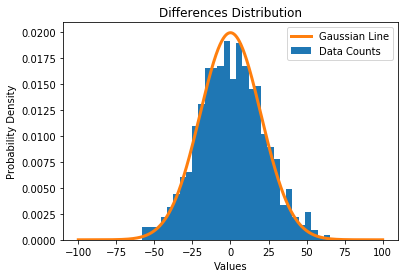

In [202]:
fig, ax = plt.subplots(1, 1)
ax.hist(test1,30,density=True,label = 'Data Counts')
x = np.linspace(-100,100,1000)
ax.plot(x,stats.norm.pdf(x,0, 20),linewidth = 3,label='Gaussian Line')
plt.title("Differences Distribution")
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The Gaussian line shows the distribution of the different between the expect and exact data fits the Gaussian distribution. The distribution looks like gaussian because the method for predicting signal in region A is good method. The data near the 0 are more frequent occurrence than the data far away from the 0. 

As the assignment request, we will vary the size of the statistics with 1000 runs for each, start with 10 events, then do 100, 500, 1000, 5000, 10000, 50000.

In [203]:
Size2 = [10, 100, 500, 1000, 5000, 10000, 50000]
test3 = ErrorPlots (Size2,0)

Below we create a table that show the size of the statistics, number o fail prediction, and the Sigma of the distribution.

In [204]:
t = Table(test3, names=('Size', 'Sigma', 'Number Fail'))
print(t)

 Size       Sigma        Number Fail
----- ------------------ -----------
   10 3.2526300149275076        10.0
  100  6.829676072029459         0.0
  500 15.525693588322545         0.0
 1000 20.856907721489783         0.0
 5000  47.88857377313244         0.0
10000  65.96579490711648         0.0
50000  145.1012404109878         0.0


Make a plot of the sigma of the  prediction error for 1000 runs each as a function of the statistics. 

Text(0, 0.5, 'Sigma')

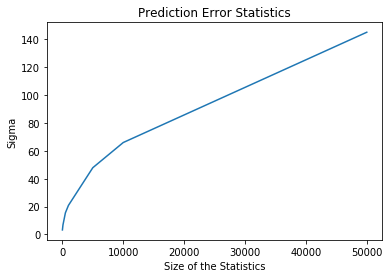

In [237]:
plt.plot(test3[0],test3[1])
plt.title("Prediction Error Statistics")
plt.xlabel('Size of the Statistics')
plt.ylabel('Sigma')

We can see from the plot above the prediction error act as some kind function of statistics. The prediction error is hard to tell the function of statistics. We going to plot the similar data for percent error, so it is easier to see the function.

In [207]:
Size4 = np.arange(100, 5000, 100)
test4 = ErrorPlots (Size4,1)

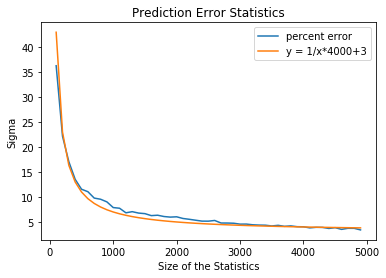

In [239]:
plt.plot(test4[0],test4[1],label='percent error')
plt.plot(Size4,1/Size4*4000+3,label='y = 1/x*4000+3')
plt.title("Percent Error Statistics")
plt.xlabel('Size of the Statistics')
plt.ylabel('Sigma')
plt.legend()
plt.show()

Form the Percent Error Statistics looks like $\frac{1}{x}$ function. 